In [141]:
import matplotlib.pyplot as plt
import numpy as np

In [142]:
# Function to read data from a file
def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data

# Function to smooth the data with a moving average
def smooth_data(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_rewards(rewards, window_size=164, title='Reward'):
    # Smoothing the rewards
    window_size = 100  # Adjust this for more or less smoothing
    smoothed_rewards = smooth_data(rewards, window_size)

    # Plotting the rewards
    plt.figure(figsize=(10, 6))
#     plt.plot(smoothed_rewards, label='Smoothed Reward', color='red')
    plt.plot(rewards, label='Original Rewards', alpha=0.5)  # Original rewards (more transparent)
    plt.plot(range(window_size-1, len(rewards)), smoothed_rewards, label='Smoothed Rewards', color='orange')  # Smoothed rewards
    plt.xlabel('Episode')
    plt.ylabel(title)
    plt.title(title + 's Over Episodes (Smoothed)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot actor and critic losses separately with smoothing
def plot_losses_separately(actor_loss, critic_loss, window_size=164):
    # Smooth the data
    smoothed_actor_loss = smooth_data(actor_loss, window_size)
    smoothed_critic_loss = smooth_data(critic_loss, window_size)

    # Plot for Actor Loss
    plt.figure(figsize=(10, 5))
    plt.plot(smoothed_actor_loss, label='Smoothed Actor Loss', color='blue')
#     plt.plot(actor_loss, label='Actor Loss', color='blue')
#     plt.plot(range(window_size-1, len(actor_loss)), smoothed_actor_loss, label='Smoothed Actor Loss', color='orange')  # Smoothed rewards
    plt.xlabel('Training Steps')
    plt.ylabel('Actor Loss')
    plt.title('Smoothed Actor Loss Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot for Critic Loss
    plt.figure(figsize=(10, 5))
    plt.plot(smoothed_critic_loss, label='Smoothed Critic Loss', color='red')
#     plt.plot(critic_loss, label='Critic Loss', color='blue')
#     plt.plot(range(window_size-1, len(critic_loss)), smoothed_critic_loss, label='Smoothed Critic Loss', color='orange')  # Smoothed rewards
    plt.xlabel('Training Steps')
    plt.ylabel('Critic Loss')
    plt.title('Smoothed Critic Loss Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [161]:
# Replace with your actual file path
date ='04_10_20_13'#'04_09_19_15'# '04_08_05_03'  # '04_04_19_13'  # '03_25_02_57' # '03_26_16_27'
episode = 2000
makespan_file_path='makespan_' + date + '.txt'
rewards_file_path = 'rewards_' + date + '.txt'
actor_file_path='actor_loss_' + date + '.txt'
critic_file_path='critic_loss_' + date + '.txt'

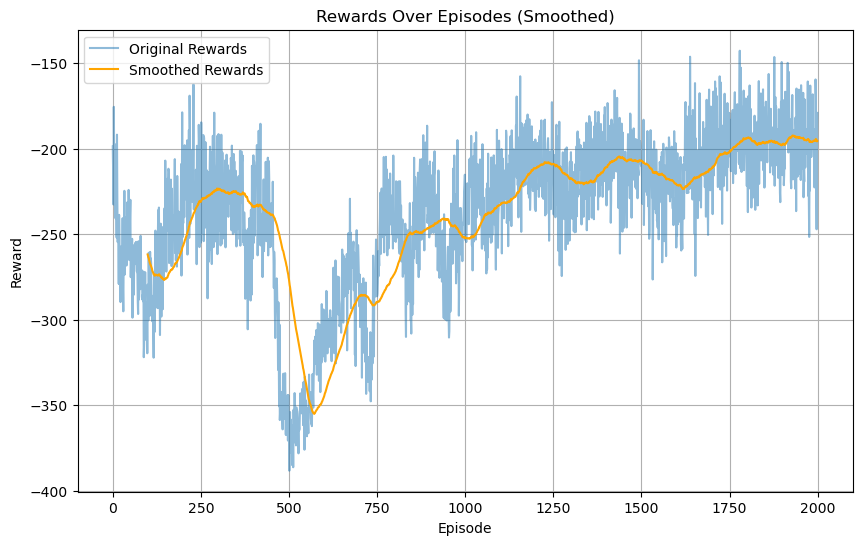

In [162]:
# Reading the data from files
rewards = read_data(rewards_file_path)
plot_rewards(rewards[:episode])

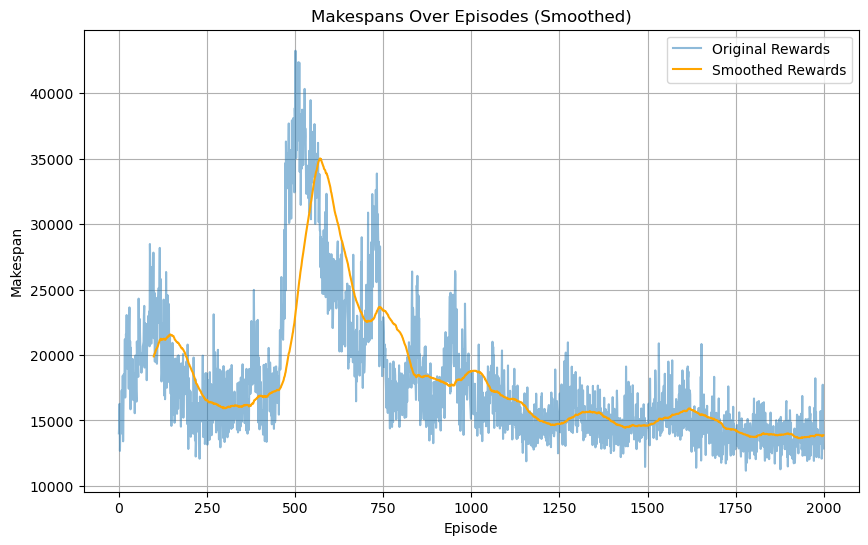

In [163]:
makespans = read_data(makespan_file_path)
plot_rewards(makespans[:episode], title='Makespan')

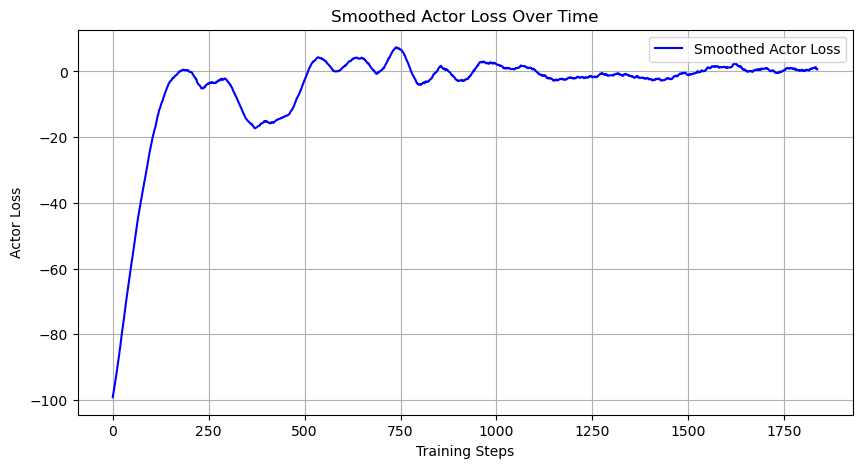

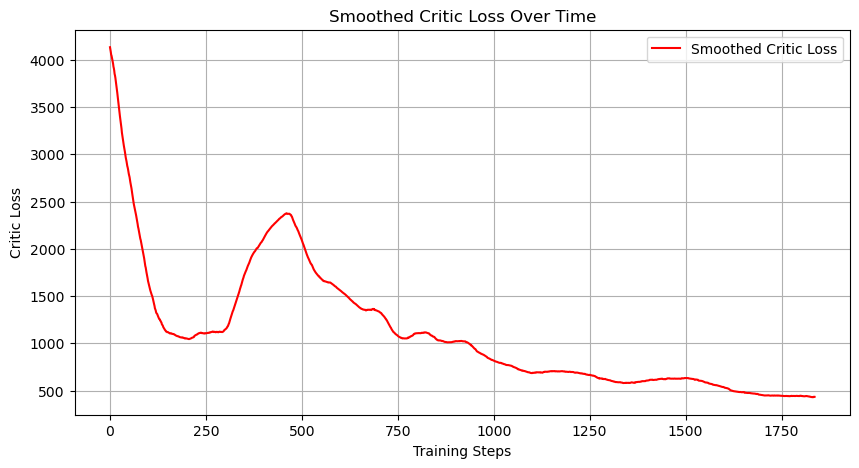

In [164]:
actor_loss = read_data(actor_file_path)
critic_loss = read_data(critic_file_path)
plot_losses_separately(actor_loss[:episode], critic_loss[:episode])

In [169]:
base = np.mean(makespans[:10])
improved = np.mean(makespans[episode-10:episode])
print("{:.2f}%".format((base-improved)/base*100))
print("{:.2f}%".format((improved-10590)/base*100))

3.29%
24.73%
